#### PRACTICAL MACHINE LEARNING
#### Assignment 1: Exploring and Visualizing Data
Authors : Chris Callaghan <br>

### Data Dictionary COVID-19 

The MSDS422_COVID19 data frame has 32771 rows and 10 columns.<br>
This data frame contains the following columns:<br>
<b>Date</b><br>
Formatted  datetime64[ns]<br>
<b>Day</b><br>
Calendar day, dtype int64<br>
<b>Month</b><br>
Calendar month, dtype int64<br>
<b>Year</b><br>
Calendar year, dtype int64<br>
<b>Cases</b><br>
Number of Cases Per Day, dtype int64<br>
<b>Deaths</b><br>
Number of Deaths, dtype int64<br>
<b>Country </b><br>
Country Name, dtype object<br>
<b>Population</b><br>
Country Population<br>
<b>Continent</b><br>
Continent continuous expanses of land (Africa, Antarctica, Asia, Australia, Europe, North America, South America)<br>
<b>CumulativeNumberPer100KCases </b><br>
Cumulative Number For 14 Days of COVID-19 Cases per 100000<br>
<b>Sources:</b><br>

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [ ]:
pip install --upgrade pip

     |████████████████████████████████| 1.5MB 7.1MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
!pip install prettytable
!pip install geopandas

     |████████████████████████████████| 962 kB 7.0 MB/s 
     |████████████████████████████████| 6.4 MB 10.7 MB/s 
     |████████████████████████████████| 14.8 MB 219 kB/s 


In [ ]:
###Loading Packages###
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
import geopandas as gpd
from prettytable import PrettyTable
import seaborn as sns
import sklearn
import math
from datetime import datetime

In [ ]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

##### Load Data (for Colab/Google Drive)
##### S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/MSDS_422/Assignment_1
!pwd
!ls
print('Working Directory')
print(os.getcwd())

/content/gdrive/My Drive/MSDS_422/Assignment_1
/content/gdrive/My Drive/MSDS_422/Assignment_1
'Copy of Assignment1-GettingStarted.ipynb'   COVID.xlsx
Working Directory
/content/gdrive/My Drive/MSDS_422/Assignment_1


In [ ]:
##### Load Data 
work_dir = " /content/gdrive/My Drive/MSDS_422/Assignment_1"
covid19_dfA=pd.read_excel('./COVID.xlsx')

In [ ]:
# Check few columns to make sure the data is loaded properly
covid19_dfA.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


#### Common functions/libraries

In [ ]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')
    plt.show()
    plt.close()

np.set_printoptions(precision=3)

In [ ]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'

init_plotting()

# avoid empty plot, always good to close plot
plt.close()

#### Exploratory Data Analysis (EDA) 

In [ ]:
# Get an understanding of the data
print("Shape:", covid19_dfA.shape,"\n")
print("Variable Types:") 
print(covid19_dfA.dtypes)

covid19_dfA.head(15)

Shape: (61900, 12) 

Variable Types:
dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [ ]:
### examine the structure of the DataFrame object###
print('\nContents of covid19 data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Cases =', len(covid19_dfA), '\n') 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
covid19_dfA.columns

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(covid19_dfA))


Contents of covid19 data ---------------

Number of Cases = 61900 

     dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0 2020-12-14  ...                                           9.013779         
1 2020-12-13  ...                                           7.052776         
2 2020-12-12  ...                                           6.868768         
3 2020-12-11  ...                                           7.134266         
4 2020-12-10  ...                                           6.968658         

[5 rows x 12 columns]


In [ ]:
# Number of countries
len(covid19_dfA.countriesAndTerritories.unique())

214

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row will indicate if column has missing records
</div> 

In [ ]:
# summary statistics
covid19_dfA.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


### Review Dataset for Missing Values

<div class="alert alert-block alert-warning">
Review dataset for missing records
</div>

In [ ]:
covid19_dfA.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

## Preprocess Data for Analysis

#### Date Column formatted into ISO 8601 standard format (Year - Month - Day)

In [ ]:
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['dateRep'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['dateRep'], format='%Y/%m/%d')
covid19_dfA['Date'].head()

0   2020-12-14
1   2020-12-13
2   2020-12-12
3   2020-12-11
4   2020-12-10
Name: Date, dtype: datetime64[ns]

#### Review Data Types (dtypes)

In [ ]:
covid19_dfA.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
Date                                                          datetime64[ns]

In [ ]:
covid19_dfA.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
Date                                                             0
dtype: int64

In [ ]:
covid19_dfA.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Date
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10


In [ ]:
covid19_dfA.shape

(61900, 13)

In [ ]:
covid19_dfA.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
Date                                                          datetime64[ns]

### Create Additional Variables

In [ ]:
covid19_dfA['Cases per Million'] = round(covid19_dfA['cases']/((covid19_dfA['popData2019']/1000000)),2)
covid19_dfA['Deaths per Case'] = round(covid19_dfA['deaths']/(covid19_dfA['cases']),2)
covid19_dfA = covid19_dfA.replace([np.inf, -np.inf], np.nan)
covid19_dfA.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Date,Cases per Million,Deaths per Case
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14,19.61,0.01
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13,7.83,0.03
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12,2.97,0.10
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11,1.66,0.16
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10,5.31,0.08


### Write out file</br>

In [ ]:
covid19_dfA.to_excel("COVID19_df.xlsx")

In [ ]:
covid19_dfA.to_csv("COVID19_df.csv")

## Visualizing Data

### Gobal Analysis

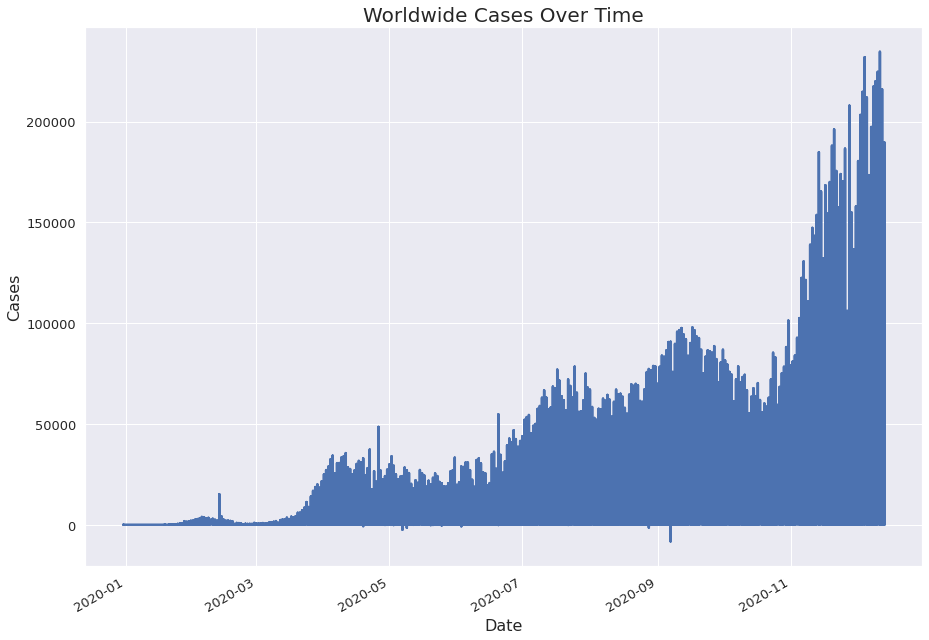

In [ ]:
world_daily = covid19_dfA.set_index('Date')
sns.set_color_codes("colorblind")
sns.set(rc={'figure.figsize':(15, 11)})
world_daily['cases'].plot(linewidth = 2.5)


plt.title('Worldwide Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

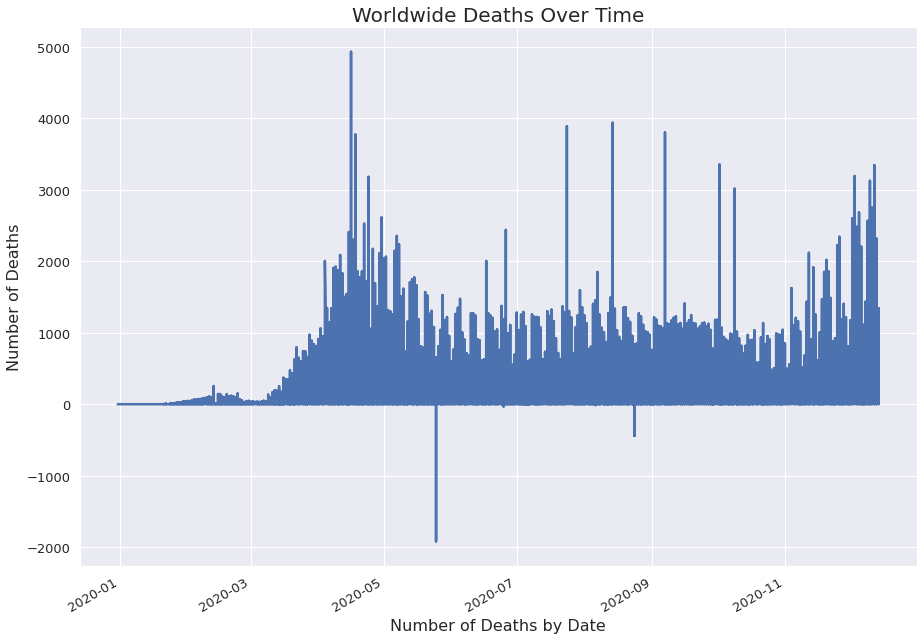

In [ ]:
sns.set(rc={'figure.figsize':(15,11)})
world_daily['deaths'].plot(linewidth = 2.5)


plt.title('Worldwide Deaths Over Time', fontsize = 20)
plt.xlabel('Number of Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

### Country Grouping

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text major ticklabel objects>)

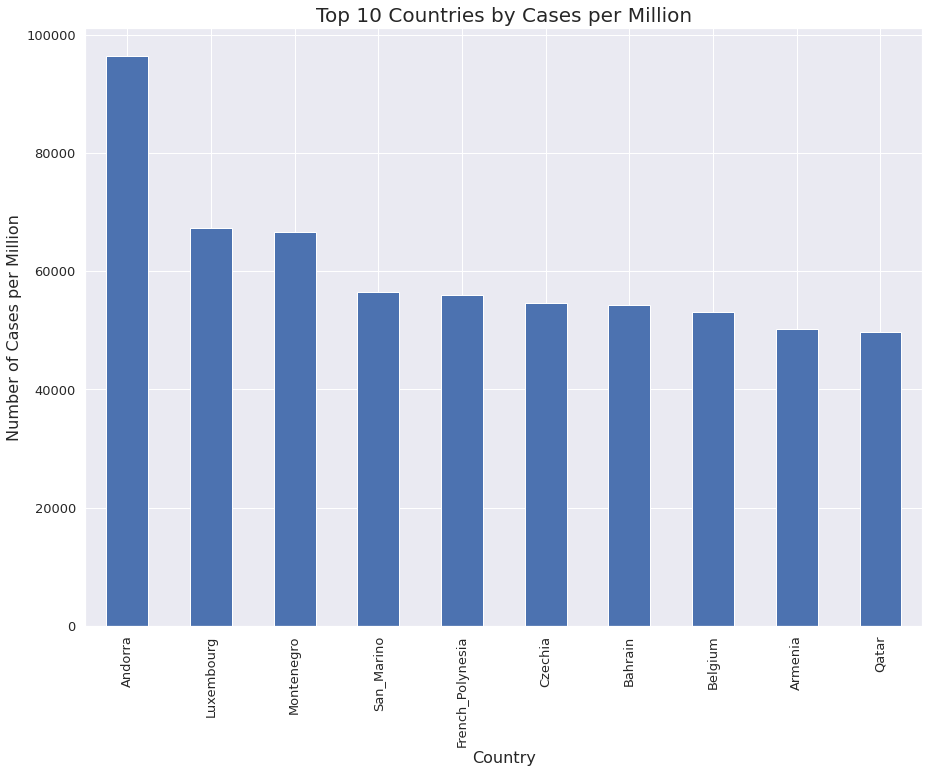

In [ ]:
cases_per_million_per_country = covid19_dfA.groupby('countriesAndTerritories').sum()['Cases per Million']
cases_per_million_per_country.nlargest(10).plot.bar()

plt.title('Top 10 Countries by Cases per Million', fontsize = 20)
plt.xlabel('Country', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases per Million', fontsize = 16)
plt.yticks(fontsize = 13)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]), <a list of 8 Text major ticklabel objects>)

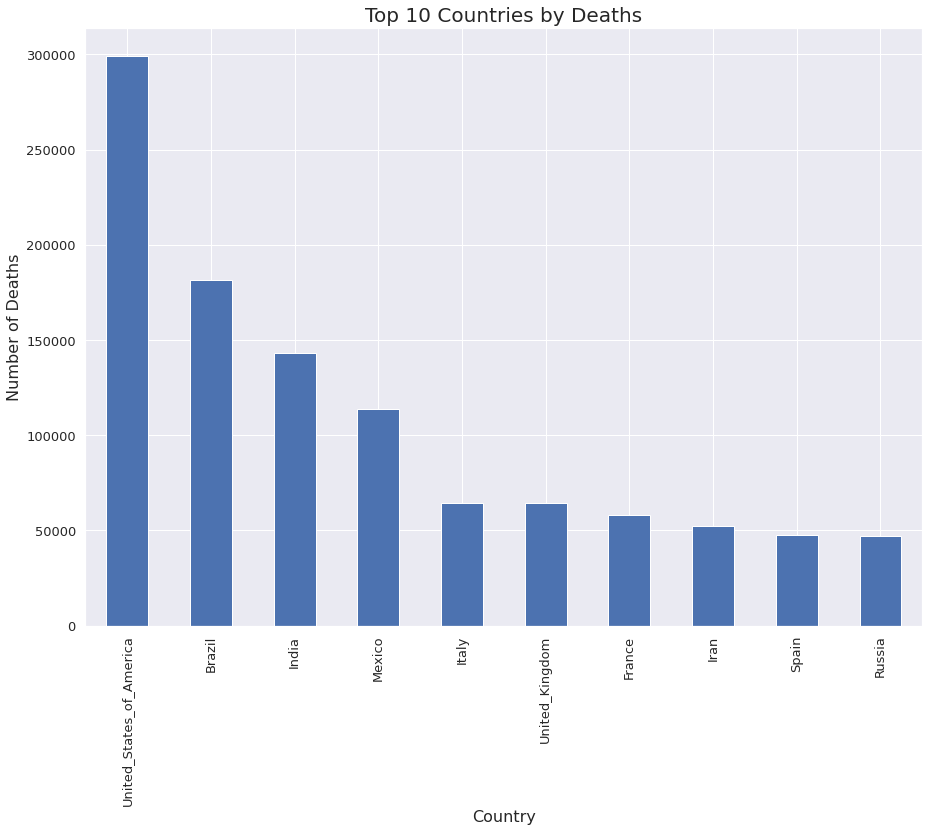

In [ ]:
deaths_per_country = covid19_dfA.groupby('countriesAndTerritories').sum()['deaths']
deaths_per_country.nlargest(10).plot.bar()

plt.title('Top 10 Countries by Deaths', fontsize = 20)
plt.xlabel('Country', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

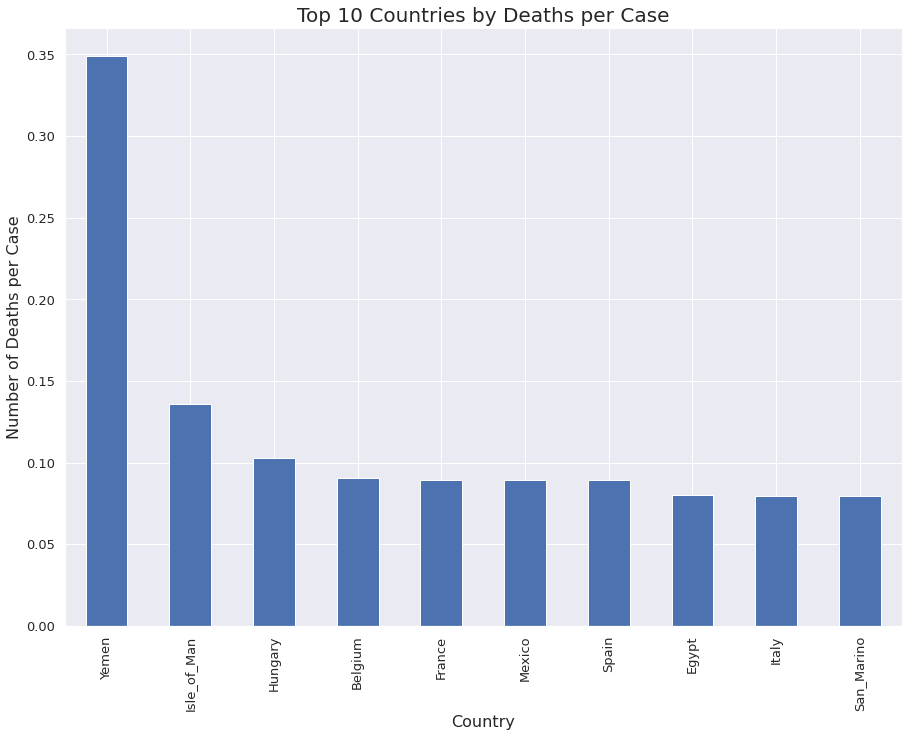

In [ ]:
deaths_per_case_per_country = covid19_dfA.groupby('countriesAndTerritories').mean()['Deaths per Case']
deaths_per_case_per_country.nlargest(10).plot.bar()

plt.title('Top 10 Countries by Deaths per Case', fontsize = 20)
plt.xlabel('Country', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths per Case', fontsize = 16)
plt.yticks(fontsize = 13)

### United Stats Specific Analsyis

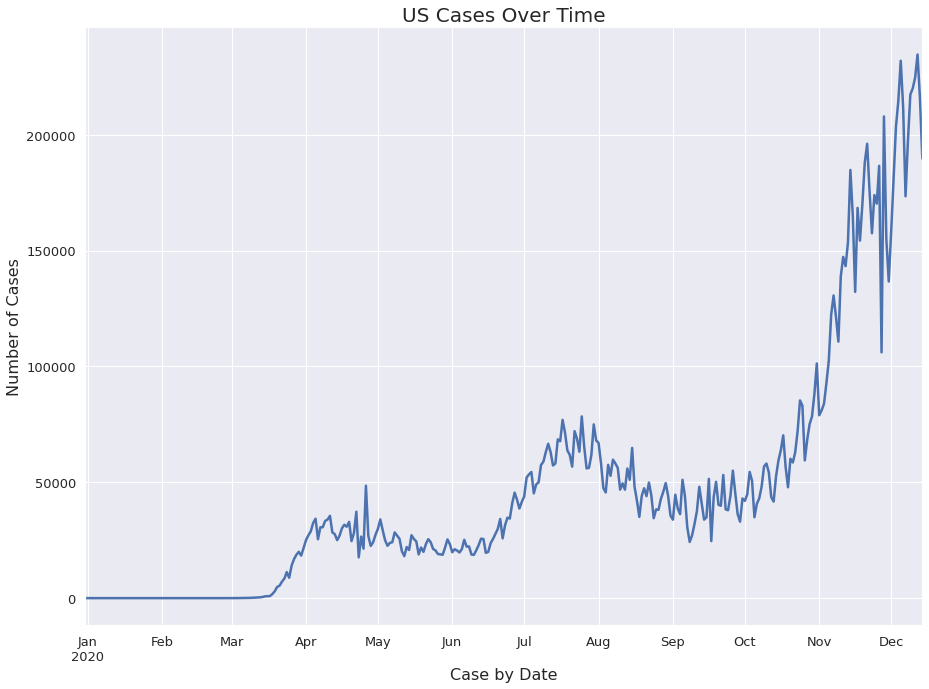

In [ ]:
UScovid19_df = covid19_dfA[covid19_dfA["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['cases'].plot(linewidth = 2.5)

plt.title('US Cases Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

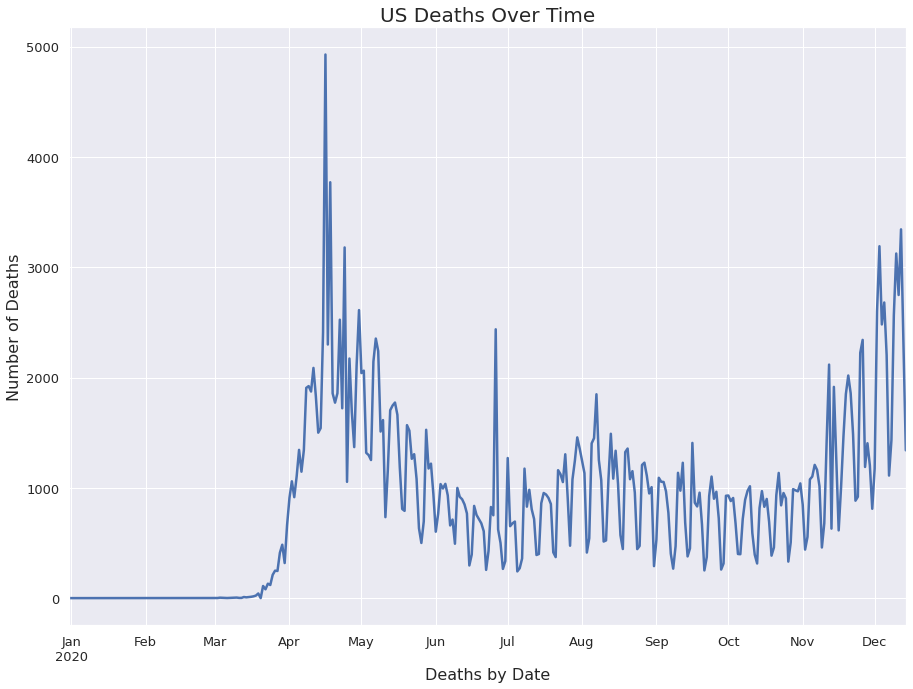

In [ ]:
UScovid19_df = covid19_dfA[covid19_dfA["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['deaths'].plot(linewidth = 2.5)

plt.title('US Deaths Over Time', fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

#### Bivariate relation between deaths and cases

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


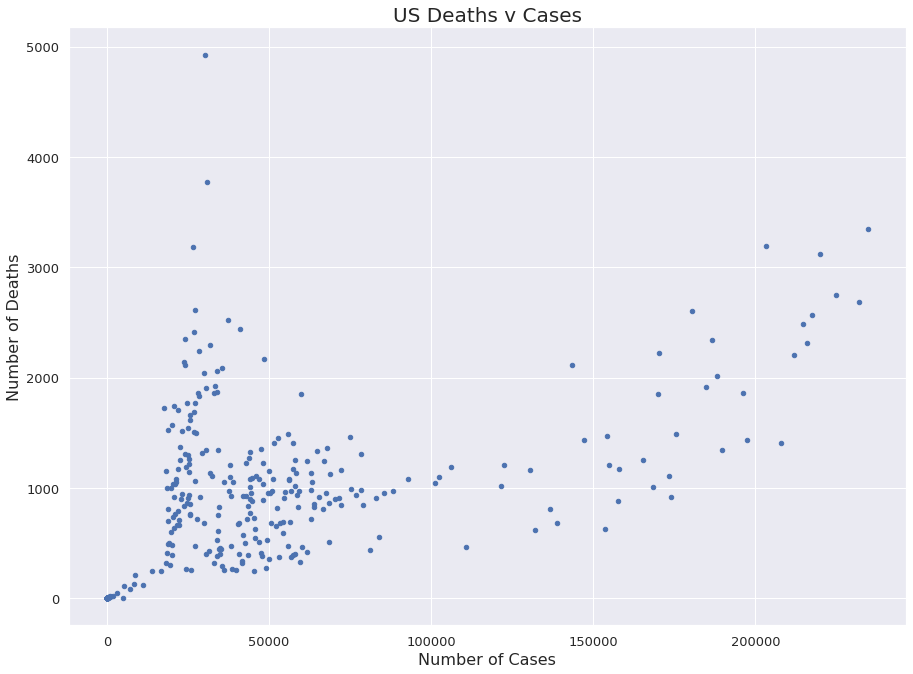

In [ ]:
UScovid19_df = covid19_dfA[covid19_dfA["countriesAndTerritories"] == "United_States_of_America"].reset_index()

sns.set(rc={'figure.figsize':(15, 11)})
UScovid19_df.plot.scatter(x='cases',y='deaths')

plt.title('US Deaths v Cases', fontsize = 20)
plt.xlabel('Number of Cases', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

#### Data Scaling & Comparisons






##### Unscaled

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from scipy.stats import kurtosis
from scipy.stats import skew

In [ ]:
# Function to Specify Transformation and Scale data
def scaler(df, attribute, scaler):
    X = df[attribute]
    X_R = X.values.reshape(-1,1) #Transformation of 1D array must be reshaped to 2D array
    scaler_ = scaler()
    return scaler_.fit_transform(X_R)

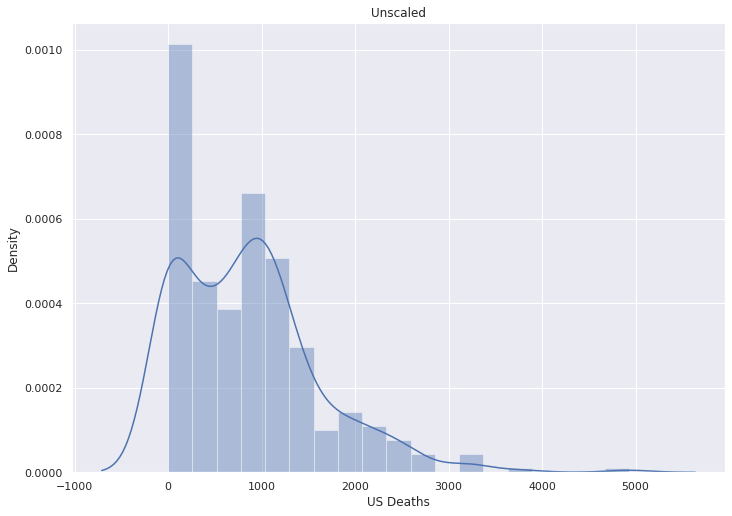

In [49]:
#Unscaled Plot
X = UScovid19_df['deaths']
unscaled_fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(X).set_title('Unscaled')
plt.xlabel('US Deaths');

In [ ]:
print('Kurtosis of Unscaled:', kurtosis(X, fisher=False))
print('Skewness of Unscaled:', skew(X))

Kurtosis of Unscaled: 5.591178779778728
Skewness of Unscaled: 1.221257432596466


##### Standard Scaler

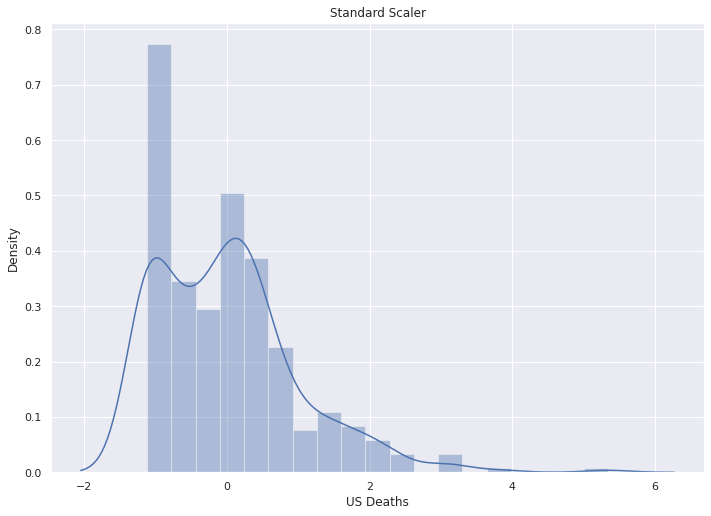

In [ ]:
#Standard Scaler
US_Death_Standard = scaler(UScovid19_df, 'deaths', StandardScaler)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(US_Death_Standard).set_title('Standard Scaler')
plt.xlabel('US Deaths');

In [ ]:
print('Kurtosis of Standard Scaler:', kurtosis(US_Death_Standard, fisher=False))
print('Skewness of Standard Scaler:', skew(US_Death_Standard))

Kurtosis of Standard Scaler: [5.59117878]
Skewness of Standard Scaler: [1.22125743]


##### Min Max Scaler

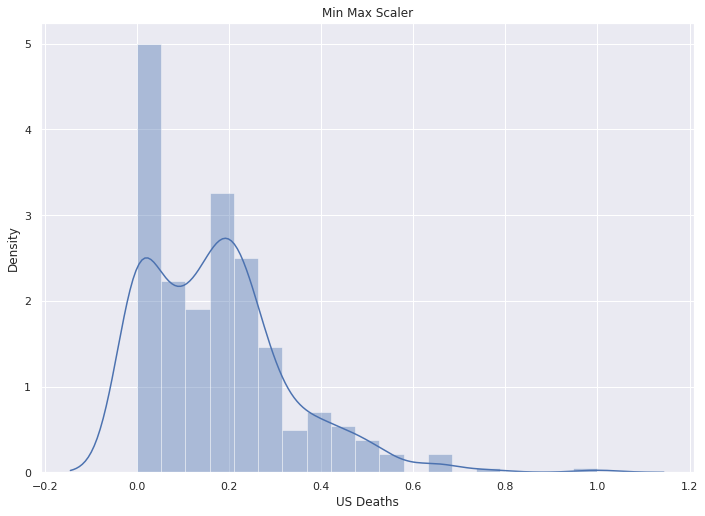

In [ ]:
#Min Max Scaler
US_Deaths_Min_Max = scaler(UScovid19_df, 'deaths', MinMaxScaler)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(US_Deaths_Min_Max).set_title('Min Max Scaler')
plt.xlabel('US Deaths');

In [ ]:
print('Kurtosis of Min Max Scaler:', kurtosis(US_Deaths_Min_Max, fisher=False))
print('Skewness of Min Max Scaler:', skew(US_Deaths_Min_Max))

Kurtosis of Min Max Scaler: [5.59117878]
Skewness of Min Max Scaler: [1.22125743]


###FINDINGS/ANALYSIS:



All scalers used did not affect the shape of the distributions and had higher than noram kurtosis scores (5.59).  They also had positive skewness at 1.22, which is likely due to outliers in the data which we identified in the time series US Deaths plot.  Other scaling options and outlier handling options should be explored before moving to futher analysis.